In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

/Users/hinalpanchal/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
telecom_data = pd.read_csv('Customer_Churn.csv')
telecom_data.head()

,CustomerID,Age,Gender,Tenure,MonthlyCharges,ContractType,InternetService,TotalCharges,TechSupport,Churn
0,1,49,Male,4,88.35,Month-to-Month,Fiber Optic,353.40,Yes,Yes
1,2,43,Male,0,36.67,Month-to-Month,Fiber Optic,0.00,Yes,Yes
2,3,51,Female,2,63.79,Month-to-Month,Fiber Optic,127.58,No,Yes
3,4,60,Female,8,102.34,One-Year,DSL,818.72,Yes,Yes
4,5,42,Male,32,69.01,Month-to-Month,None,2208.32,No,Yes


In [3]:
telecom_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerID       1000 non-null   int64  
 1   Age              1000 non-null   int64  
 2   Gender           1000 non-null   object 
 3   Tenure           1000 non-null   int64  
 4   MonthlyCharges   1000 non-null   float64
 5   ContractType     1000 non-null   object 
 6   InternetService  1000 non-null   object 
 7   TotalCharges     1000 non-null   float64
 8   TechSupport      1000 non-null   object 
 9   Churn            1000 non-null   object 
dtypes: float64(2), int64(3), object(5)
memory usage: 78.2+ KB


In [4]:
telecom_data.isna().sum()

CustomerID         0
Age                0
Gender             0
Tenure             0
MonthlyCharges     0
ContractType       0
InternetService    0
TotalCharges       0
TechSupport        0
Churn              0
dtype: int64

In [5]:
telecom_data.duplicated().sum()

0

# EDA

In [6]:
telecom_data['Churn'].value_counts()

Yes    883
No     117
Name: Churn, dtype: int64

Text(0.5, 1.0, 'Churn Value Yes/No')

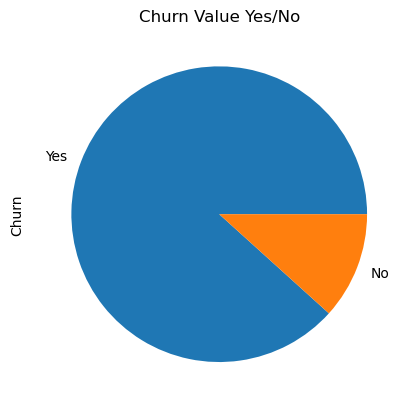

In [7]:
telecom_data['Churn'].value_counts().plot(kind='pie')
plt.title('Churn Value Yes/No')


In [8]:
telecom_data.groupby('Churn')['MonthlyCharges'].mean()

Churn
No     62.54641
Yes    75.96077
Name: MonthlyCharges, dtype: float64

In [9]:
telecom_data.groupby(['Churn','Gender'])['MonthlyCharges'].mean()

Churn  Gender
No     Female    65.091912
       Male      59.013878
Yes    Female    74.975064
       Male      77.082518
Name: MonthlyCharges, dtype: float64

In [10]:
telecom_data.groupby('Churn')['Tenure'].mean()

Churn
No     30.264957
Yes    17.476784
Name: Tenure, dtype: float64

Text(0.5, 0, 'Contract Type')

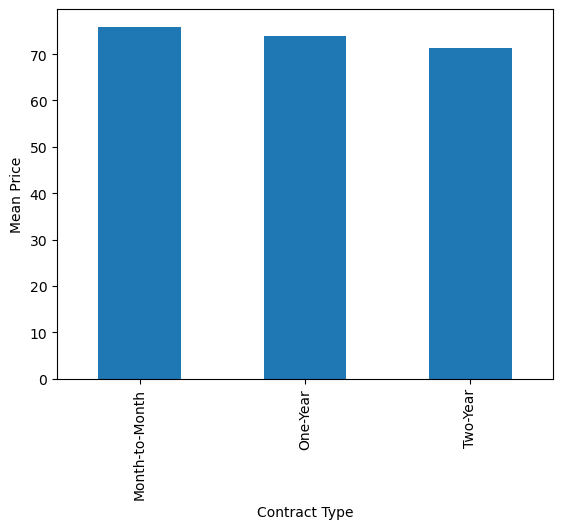

In [11]:
telecom_data.groupby('ContractType')['MonthlyCharges'].mean().plot(kind='bar')
plt.ylabel('Mean Price')
plt.xlabel('Contract Type')

In [12]:
telecom_data.groupby(['InternetService','Churn'])['TotalCharges'].mean()

InternetService  Churn
DSL              No       1650.001875
                 Yes      1342.233038
Fiber Optic      No       1976.429130
                 Yes      1288.080798
None             Yes      1413.789327
Name: TotalCharges, dtype: float64

Text(0.5, 1.0, 'Monthly Charges')

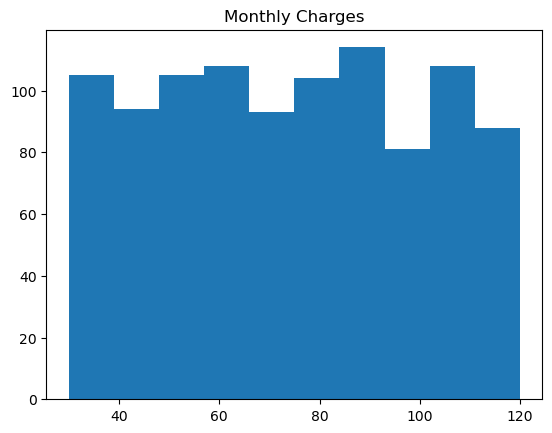

In [13]:
plt.hist(telecom_data['MonthlyCharges'])
plt.title('Monthly Charges')

Text(0.5, 1.0, 'Histogram for Tenure')

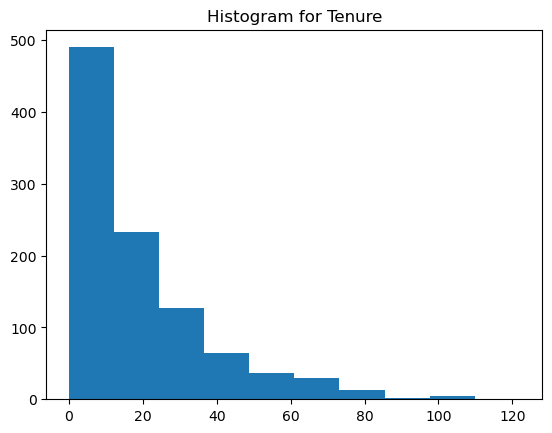

In [14]:
plt.hist(telecom_data['Tenure'])
plt.title('Histogram for Tenure')

# Feature Re-Engineering

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.pipeline import Pipeline

In [16]:
telecom_data.head(1)

,CustomerID,Age,Gender,Tenure,MonthlyCharges,ContractType,InternetService,TotalCharges,TechSupport,Churn
0,1,49,Male,4,88.35,Month-to-Month,Fiber Optic,353.4,Yes,Yes


In [17]:
telecom_data.columns

Index(['CustomerID', 'Age', 'Gender', 'Tenure', 'MonthlyCharges',
       'ContractType', 'InternetService', 'TotalCharges', 'TechSupport',
       'Churn'],
      dtype='object')

In [18]:
y= telecom_data['Churn']
X= telecom_data[['Age', 'Gender', 'Tenure', 'MonthlyCharges']]

In [19]:
# Gender 1- Female, 0-Male
X.loc[:, 'Gender'] = X['Gender'].apply(lambda x: 1 if x == 'Female' else 0)

/var/folders/qw/sl7j3jj94ngg0_334hjh2ycm0000gn/T/ipykernel_44305/1439695941.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.loc[:, 'Gender'] = X['Gender'].apply(lambda x: 1 if x == 'Female' else 0)


In [20]:
X.head(3)

,Age,Gender,Tenure,MonthlyCharges
0,49,0,4,88.35
1,43,0,0,36.67
2,51,1,2,63.79


In [21]:
# Churn Yes=1 ,No=0
# Using apply + lambda
y = y.apply(lambda x: 1 if x == 'Yes' else 0)

In [22]:
y.head(10)

0    1
1    1
2    1
3    1
4    1
5    1
6    1
7    1
8    0
9    1
Name: Churn, dtype: int64

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

In [24]:
scaler = StandardScaler()

X_train =scaler.fit_transform(X_train)

# We dump the data as before Scaling the X_test as there might be lekage when performing Standard Scaler

In [25]:
import joblib
joblib.dump(scaler,'scaler.pkl')

['scaler.pkl']

In [26]:
X_test = scaler.fit_transform(X_test)

In [32]:
from sklearn.metrics import accuracy_score

def modelperformance(prediction):
    print('Accuracy score on model is {}'.format(accuracy_score(y_test,y_pred)))

In [33]:
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

# LOGISTIC REGRESSION

In [34]:
LogR =LogisticRegression()
LogR.fit(X_train,y_train)

LogisticRegression()

In [35]:
y_pred = LogR.predict(X_test)

In [36]:
modelperformance(y_pred)

Accuracy score on model is 0.88


# KNN

In [37]:
from sklearn.neighbors import KNeighborsClassifier

In [44]:
param_grid = {
    'n_neighbors':[3,5,7,9],
    'weights':['uniform','distnace'],
}

gridkn = GridSearchCV(KNeighborsClassifier(),param_grid, cv=5)

In [45]:
gridkn.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 7, 9],
                         'weights': ['uniform', 'distnace']})

In [46]:
gridkn.best_params_

{'n_neighbors': 9, 'weights': 'uniform'}

In [47]:
y_preds = gridkn.predict(X_test)

In [48]:
modelperformance(y_pred)

Accuracy score on model is 0.88


# SVM

In [49]:
from sklearn.svm import SVC

In [50]:
svm =SVC()
param_grid_svm = {'C':[0.01,0.1,0.5,1],'kernel':['linear','rbf','poly']}

In [51]:
gridsvm = GridSearchCV(svm,param_grid_svm,cv=5)

In [52]:
gridsvm.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 0.5, 1],
                         'kernel': ['linear', 'rbf', 'poly']})

In [53]:
gridsvm.best_params_

{'C': 0.01, 'kernel': 'linear'}

In [54]:
y_pred = gridsvm.predict(X_test)

In [55]:
modelperformance(y_pred)

Accuracy score on model is 0.89


# Decision Tree Classifier

In [56]:
from sklearn.tree import DecisionTreeClassifier

param_grid ={
    'criterion': ["entropy", "gini"],
    'splitter': ['best','random'],
    'max_depth': [None,10,20,30],
    'min_samples_leaf': [1, 2, 4],
    'min_samples_split': [2, 5, 10]
}

In [57]:
grid_tree = GridSearchCV(DecisionTreeClassifier(),param_grid, cv=5)

In [58]:
grid_tree.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'splitter': ['best', 'random']})

In [59]:
grid_tree.best_params_

{'criterion': 'entropy',
 'max_depth': None,
 'min_samples_leaf': 4,
 'min_samples_split': 10,
 'splitter': 'random'}

In [60]:
y_pred = grid_tree.predict(X_test)

In [61]:
modelperformance(y_pred)

Accuracy score on model is 0.805


# Random Forest Classifier

In [63]:
from sklearn.ensemble import RandomForestClassifier

In [65]:
rfc_model = RandomForestClassifier()

param_grid = {
    'n_estimators': [32,64,128,256],
    'max_features': [2,3,4],
    'bootstrap':[True,False]
}

In [66]:
rfc = GridSearchCV(rfc_model,param_grid,cv=5)

In [67]:
rfc.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False], 'max_features': [2, 3, 4],
                         'n_estimators': [32, 64, 128, 256]})

In [70]:
rfc.best_params_

{'bootstrap': True, 'max_features': 2, 'n_estimators': 128}

In [68]:
y_pred = rfc.predict(X_test)

In [69]:
modelperformance(y_pred)

Accuracy score on model is 0.885


In [71]:
best_model = gridsvm.best_estimator_

In [72]:
joblib.dump(best_model,'model.pkl')

['model.pkl']